In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
 
df = pd.read_csv(r"D:\Trí tuệ nhân tạo\sen_0521\Export_Output_2.csv")
X = df[['brightness'	, 'min_rgb',	'ndi_rb',	'range_rgb',	'whiteness2',	'br_ratio',	'ndvi'
]]  # tùy bạn
y = df['Classvalue']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
 
importances = model.feature_importances_
for name, score in zip(X.columns, importances):
	print(f'{name}: {score:.4f}')


brightness: 0.0101
min_rgb: 0.0131
ndi_rb: 0.0073
range_rgb: 0.0037
whiteness2: 0.0050
br_ratio: 0.5369
ndvi: 0.4240



📋 Feature Ranking:
      Feature  Importance
6     min_rgb    0.283510
0  brightness    0.279031
7     max_rgb    0.191348
4    br_ratio    0.081765
2      ndi_rb    0.070350
3    gr_ratio    0.038420
8        ndvi    0.028405
1  whiteness2    0.013755
5   range_rgb    0.013416


C:\Users\Admin\AppData\Local\Temp\ipykernel_444\471491794.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=ranking_df, palette='viridis')


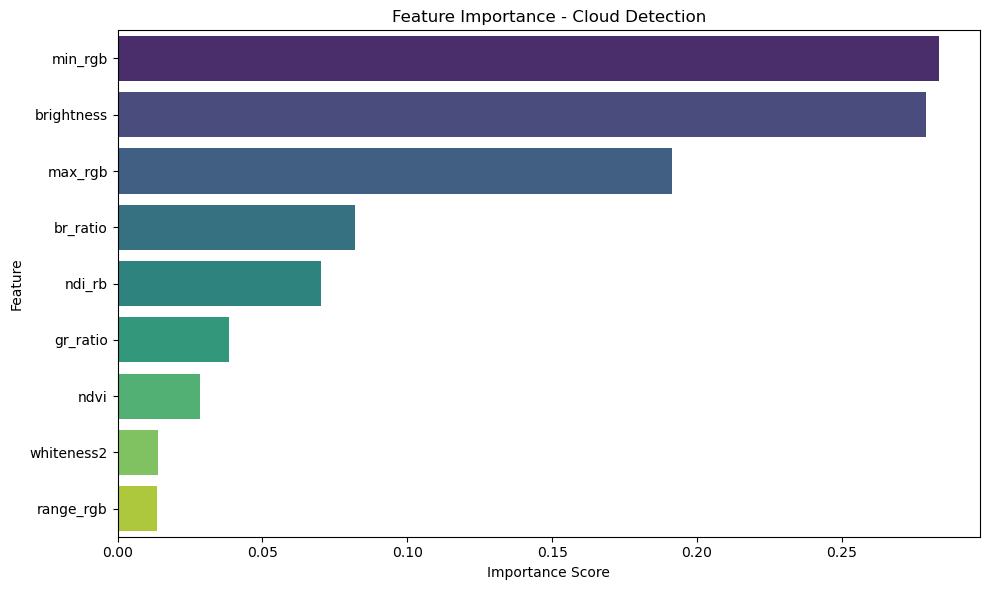


📊 Classification Report:
              precision    recall  f1-score   support

           1      0.969     0.939     0.954        33
           2      0.943     0.971     0.957        34

    accuracy                          0.955        67
   macro avg      0.956     0.955     0.955        67
weighted avg      0.956     0.955     0.955        67



In [11]:
# ============================
# STEP 1: Import thư viện
# ============================'brightness', 'whiteness2', 'ndi_rb', 'gr_ratio', 'br_ratio', 'range_rgb', 'min_rgb', 'max_rgb', 'ndvi'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
 
# ============================
# STEP 2: Đọc dữ liệu
# ============================
df = pd.read_csv(r"D:\Trí tuệ nhân tạo\sen_0521\Export_Output_2.csv")
 
# ============================
# STEP 3: Chọn features & labels
# ============================
features = ['brightness', 'whiteness2', 'ndi_rb', 'gr_ratio', 'br_ratio', 'range_rgb', 'min_rgb', 'max_rgb', 'ndvi'
	
]
X = df[features]
y = df['Classvalue']  # nhãn: 1 = Non-cloud, 2 = Cloud
 
# ============================
# STEP 4: Train/test split
# ============================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# ============================
# STEP 5: Train Random Forest
# ============================
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
 
# ============================
# STEP 6: Ranking feature
# ============================
importances = model.feature_importances_
ranking_df = pd.DataFrame({'Feature': features, 'Importance': importances})
ranking_df = ranking_df.sort_values('Importance', ascending=False)
 
# Hiển thị bảng
print("\n📋 Feature Ranking:")
print(ranking_df)
 
# ============================
# STEP 7: Biểu đồ Feature Importance
# ============================
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=ranking_df, palette='viridis')
plt.title("Feature Importance - Cloud Detection")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
 
# ============================
# STEP 8: Đánh giá mô hình thử nghiệm
# ============================
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, digits=3))



Tính GLCM

In [23]:
%pip install scikit-image --upgrade
from skimage.feature import graycomatrix
print("✔ graycomatrix đã sẵn sàng!")



   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.9 MB 3.3 MB/s eta 0:00:04
   ----- ---------------------------------- 1.8/12.9 MB 3.6 MB/s eta 0:00:04
   ------- -------------------------------- 2.4/12.9 MB 3.4 MB/s eta 0:00:04
   ---------- ----------------------------- 3.4/12.9 MB 3.7 MB/s eta 0:00:03
   ------------- -------------------------- 4.2/12.9 MB 3.9 MB/s eta 0:00:03
   ---------------- ----------------------- 5.2/12.9 MB 3.9 MB/s eta 0:00:02
   -------------------- ------------------- 6.6/12.9 MB 4.2 MB/s eta 0:00:02
   ----------------------- ---------------- 7.6/12.9 MB 4.3 MB/s eta 0:00:02
   -------------------------- ------------- 8.7/12.9 MB 4.4 MB/s eta 0:00:01
   ------------------------------ --------- 9.7/12.9 MB 4.5 MB/s eta 0:00:01
   --------------------------------- ------ 10.7/12.9 MB 4.6 MB/s eta 0:00:01
   ---------

Tách Band

In [5]:
import rasterio
import os

# Đường dẫn đến ảnh đa band
input_path = r"D:\Trí tuệ nhân tạo\sen_0326\rmvbg_0326.tif"
output_dir = r"D:\Trí tuệ nhân tạo\sen_0326\split_4bands"

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

with rasterio.open(input_path) as src:
    for i in range(1, src.count + 1):  # src.count là số bands
        band = src.read(i)
        profile = src.profile
        profile.update(count=1)

        output_path = os.path.join(output_dir, f"band_{i}.tif")
        with rasterio.open(output_path, 'w', **profile) as dst:
            dst.write(band, 1)
        print(f"Saved {output_path}")

Saved D:\Trí tuệ nhân tạo\sen_0326\split_4bands\band_1.tif
Saved D:\Trí tuệ nhân tạo\sen_0326\split_4bands\band_2.tif
Saved D:\Trí tuệ nhân tạo\sen_0326\split_4bands\band_3.tif
Saved D:\Trí tuệ nhân tạo\sen_0326\split_4bands\band_4.tif


In [ ]:
import numpy as np
import rasterio
import os

# === Cấu hình ===
band_dir = r"D:\Trí tuệ nhân tạo\sen_0326\split_4bands"   # Thư mục chứa các band
output_dir = r"D:\Trí tuệ nhân tạo\sen_0326\S"           # Thư mục lưu các feature
os.makedirs(output_dir, exist_ok=True)

# === Đọc các band với đúng thứ tự phổ ===
with rasterio.open(os.path.join(band_dir, "band_1.tif")) as src:
    red = src.read(1).astype(np.float32)
    profile = src.profile

with rasterio.open(os.path.join(band_dir, "band_2.tif")) as src:
    green = src.read(1).astype(np.float32)

with rasterio.open(os.path.join(band_dir, "band_3.tif")) as src:
    blue = src.read(1).astype(np.float32)

with rasterio.open(os.path.join(band_dir, "band_4.tif")) as src:
    nir = src.read(1).astype(np.float32)

# === Tính các chỉ số đặc trưng phổ ===
eps = 1e-4  # Tránh chia cho 0

brightness = (red + green + blue) / 3
ndvi = (nir - red) / (nir + red + eps)
ndi_rb = (red - blue) / (red + blue + eps)
min_rgb = np.minimum.reduce([red, green, blue])
br_ratio = blue / (red + eps)

# === Lưu từng raster ===
features = {
    "brightness.tif": brightness,
    "ndvi.tif": ndvi,
    "ndi_rb.tif": ndi_rb,
    "min_rgb.tif": min_rgb,
    "br_ratio.tif": br_ratio,
}

profile.update(dtype=rasterio.float32, count=1)

for name, array in features.items():
    out_path = os.path.join(output_dir, name)
    with rasterio.open(out_path, "w", **profile) as dst:
        dst.write(array, 1)
    print(f"✅ Saved {out_path}")


✅ Saved D:\Trí tuệ nhân tạo\sen_0326\S\brightness.tif
✅ Saved D:\Trí tuệ nhân tạo\sen_0326\S\ndvi.tif
✅ Saved D:\Trí tuệ nhân tạo\sen_0326\S\ndi_rb.tif
✅ Saved D:\Trí tuệ nhân tạo\sen_0326\S\min_rgb.tif
✅ Saved D:\Trí tuệ nhân tạo\sen_0326\S\br_ratio.tif
